In [37]:
import numpy as np
import matplotlib.pyplot as plt

### 一张图片RGB三层通道顺序堆叠在一起形成一个n维的向量
### n = [红，绿，蓝]
### n表示向量的维度
### $$ x ∈ R^{nx}  表示准备训练的数据维度$$
### $$ y ∈ \{{0,1}\} $$ 
### m 表示样本的数量 : $$ {(x^{(1)},y^{(1)}),(x^{(2)},y^{(2)}),（x^{(2)},y^{(2)})...(x^{(m)},y^{(m)})} $$
### 有时候也写成 M = M(train)
### $$ X=\begin{bmatrix} ... & ... & ... & ... & ... \\ X^{(1)} & X^{(2)} & X^{(3)} & ... & X^{(m)}\\ ... & ... & ... & ... & ...\end{bmatrix} $$
#### 上面这个矩阵的行是n列是m
#### 矩阵向量的定义是把样本按行排列：$$X^{T}$$
$$ X=\begin{bmatrix} ... &  X^{(1)} & ... \\ ... & X^{(2)} & ... \\ ...& ... & ... \\... & X^{(m)} & ... \end{bmatrix} $$
### 但是事实证明，神经网络中还是X更适合

## 下面开始创建一些例子来说明

In [38]:
def create_data_for_example():
  return np.mat((np.random.sample(25).reshape(5,5)*1000).astype(int))
create_data_for_example()

matrix([[625, 539, 108, 333, 297],
        [757, 187, 623, 130,  66],
        [681, 612, 341, 726, 783],
        [145, 856, 355, 885, 229],
        [273,  67,  11, 792,  31]])

In [39]:
def Xi():
  return np.ravel(create_data_for_example())
Xi()

array([ 51, 457, 105, 677,  22,  51, 896, 406, 870, 923, 312, 117,   2,
        57, 464, 610, 380, 140, 794, 576, 525, 579, 120, 287, 863])

## 整理样本成为X矩阵
$$ X=\begin{bmatrix} ... & ... & ... & ... & ... \\ X^{(1)} & X^{(2)} & X^{(3)} & ... & X^{(m)}\\ ... & ... & ... & ... & ...\end{bmatrix} $$

In [40]:
X = np.array([Xi() for i in range(10)])
X

array([[842, 198, 321, 310, 778, 464, 866, 497, 933, 661, 190, 241, 228,
          2, 489, 691, 455, 335, 572, 438, 673, 274, 153, 790, 185],
       [625, 196, 124, 729, 425, 721, 418, 140, 656, 593, 462, 562, 773,
        810, 777, 628, 267, 665, 563, 230,  43, 209,  54, 917, 974],
       [552, 766, 105, 645, 642, 332, 437, 147, 116, 421, 823, 592, 231,
        162,  20, 608, 834, 940, 874, 893, 624, 750,  64, 200, 289],
       [ 99, 731, 940, 194, 511, 259, 437,  59, 648, 541,  69, 516,  21,
        878, 418,  57, 393, 662, 587,  99, 879, 220, 107,  24, 631],
       [590, 732,  60, 848, 452, 617, 624, 424, 704, 219, 967, 258, 119,
        512, 401, 735, 341, 500, 452, 306, 848, 130, 461, 570, 534],
       [585, 748, 975, 415, 724, 481, 759, 923, 686, 581, 267, 791, 592,
        779, 345, 929, 969, 522, 595, 397, 733, 155, 754, 775, 955],
       [353, 872, 125, 726, 321, 543, 573, 716, 538, 854, 224, 969, 303,
        188, 340, 991, 121, 873, 426, 258, 927,  71, 876, 286, 335],
      

## 我们先拿到样本的维度也就是n行与m列，分别对应样本的每一个样本的n个特征和有m个样本

In [41]:
n , m = X.shape
n,m

(10, 25)

### 再创建一个特征矩阵Y与X样本矩阵对应
### $$  Y =\begin{bmatrix} Y^{1} & Y^{1} & ...& Y^{1} &\end{bmatrix} $$  
### $$ y ∈ \{{0,1}\} $$


In [42]:
Y = (np.random.sample(n)+0.5).astype(int)
Y

array([1, 0, 1, 1, 0, 1, 0, 1, 1, 1])

## 2.2 logitc回归
### 可加入给定一个图片，比如是猫，
我们将图片向量化后，得到X
而图片的标签则是Y
### 我们希望得到一个算法能够得出图片是猫的概率称为Y的i帽，这个算法就是 “yhat” 表示对真实的情况下Y向量的估计
### 形式上说，yhat是预测标签Y为1的概率函数
$$ f_{yhat}(x) = P(y=1|x) $$
### 约定逻辑回归的参数是 $w$
$$ w ∈ R^{nx} $$
### 参数 $$ b $$ 是一个实数
$$ b ∈ R $$
### 在线性回归里得到yhat可以用这种方法
$$ f_{yhat}(x,w,b) = w^{T}*x+b $$




In [43]:
def h(x,w,b):
  return dot(w.T,x)+b

### 但是对分类来说，就不是一个很好的方法了因为希望yaht输出的是y为1的概率，因此，输出的值应该在0，1之间，而线性函数输出的可能是0.xxx或者比1大得多，这对概率来说就失去了意义
### 所以，我们需要一个函数，$$ sigmoid(z) $$
### $$ z = w^{T}*x+b $$
### $$ sigmoid(z) = 1/1+e^{-z} $$
### 所以函数有时候也这样写
### $$ sigmoid(x,w,b) = 1/1+e^{-(w^{T}*x+b)} $$
### 要注意的是，如果:$$abs(z)$$非常大，$$e^{-z}$$就会非常接近1,相反如果非常小就会接近于 0.然后我们就能用一个判定函数轻松的对yhat的结果进行分类 譬如阈值设置在0.5
## 所以:
## 在逻辑回归时，其实就是在学习参数:$$ w 和 b $$,得到合适的wb就能很好的估计y等于1的概率
#### $$值得注意的是，在神经网络中，我们将参数 w 和 b 分开看待，b 对应的是一个偏置量。在另一些课程中，定义了额外的特征x_0并且让 x_{0} = 1 因此x的维度变成了n_{x+1} $$
$$ x => x^{n+1}$$
### 然后定义的yhat函数就变成了$$ sigmoid(\theta^{T}*X) 在这里有一个 \theta向量 :\theta_0....\theta_{nx}  \theta 参数取代了 b 这是一个实数 \theta_0....\theta_{nx} 则是替代了参数 w  $$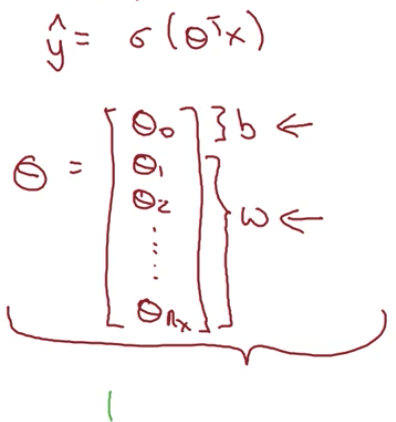 

In [44]:
def sigmoid(z):
  return 1/1+np.exp(-z)


### 要理解sigmoid函数，首先明白线性特征归一化的函数为:
### $$ X_{norm} = X-X_{min}/X_{max}-X_{min} $$ 
### $$ 1.X-X_{min} 得到当前值的Y轴去掉截距的水平高度 $$
### $$ 2.X_{max}-X_{min}得到数据集的极差，当 X-X_{min} 除以当前数据集的极差，也就显示了当前 X_{}在数据集里的高度分位，也就是X_i在Y轴高度的比例。$$


### 而sigmoid之所以可以表示的$$X_{i}$$是X矩阵的概率归一化的原因是：
#### $$ 概率的整体密度是1,X向量 作为常数的指数向量的时候，得到就是函数的整体在Y轴的反向比例 $$

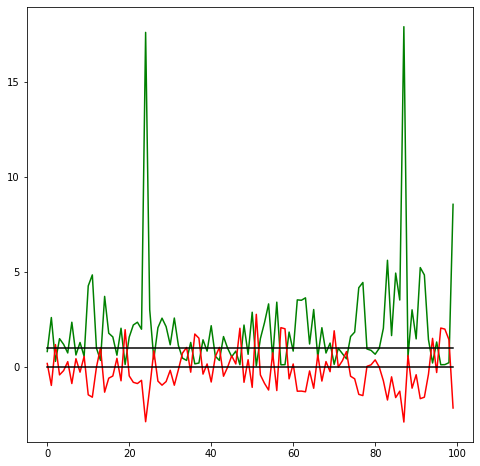

In [45]:
exampleX = (np.random.randn(100))
plt.figure(figsize=(8,8))
plt.plot(np.exp(-exampleX),c='g')
plt.plot(exampleX,c='r')
plt.plot(np.zeros_like(exampleX),'black')
plt.plot(np.ones_like(exampleX),'black')


## 当$$ 1+e^{X} $$ 时，可以消除比例相反的问题 

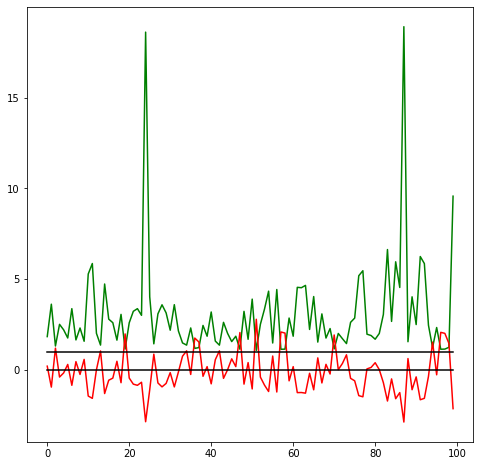

In [46]:
plt.figure(figsize=(8,8))
plt.plot(1+np.exp(-exampleX),c='g')
plt.plot(exampleX,c='r')
plt.plot(np.zeros_like(exampleX),'black')
plt.plot(np.ones_like(exampleX),'black')

## 所以用 $$ 1/1+e^{X} $$ 就可以得到向量的概率归一化,yhat的值在正负1之间

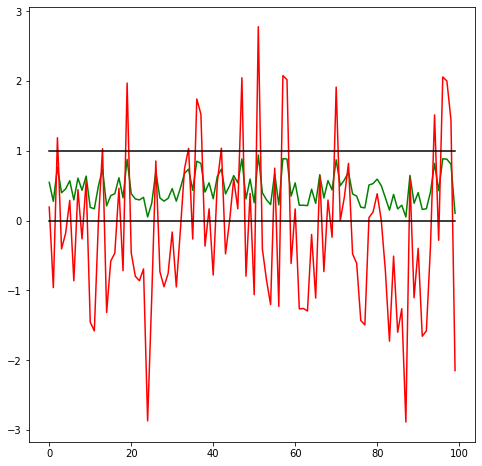

In [47]:
plt.figure(figsize=(8,8))
plt.plot(1/(1+np.exp(-exampleX)),c='g')
plt.plot(exampleX,c='r')
plt.plot(np.zeros_like(exampleX),'black')
plt.plot(np.ones_like(exampleX),'black')

### 用一个序列函数则可以更好的表明它

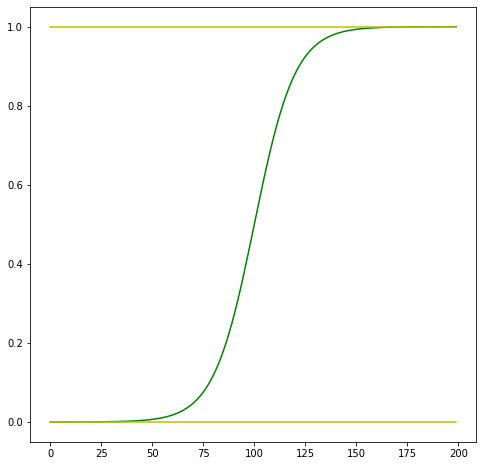

In [48]:
examplearray = np.arange(-10,10,0.1)
plt.figure(figsize=(8,8))
plt.plot(1/(1+np.exp(-examplearray)),c='g')
plt.plot(np.zeros_like(examplearray),'y')
plt.plot(np.ones_like(examplearray),'y')

## 定义损失函数
### $$ 回忆一下线性回归的损失函数 : loss(y^,y) = 1/2(y^,y)^{2} $$
### 这是一个平方误差函数 其中的期望函数 : 
### $$ y^ = h_\theta(X) = X_0 * \theta_0 + X_1 * \theta_1 ...... X_n * \theta_n ,本质上就是一个去掉斜率k的直线 $$

In [49]:
srcX = np.linspace(-10,10,1000).reshape(100,10)
srcY = np.linspace(0,0,100)
srcX.shape,srcY.shape

((100, 10), (100,))

## 梯度函数
梯度下降公式： $$ \theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m}(h_\theta(x^{(i)}) - y^{(i)}) \cdot x_j^{(i)} $$
$ x_j^{(i)} : m*1 $ 即所有样本的第j列<br/>
$ h_\theta(x^{(i)}) - y^{(i)} : m * 1 $



#实现梯度下降线性回归:
### 1.1数据标准化

### 1.2 数据预处理（标准化，X矩阵生成）

### 1.3 线性假设函数

### 1.4损失函数

## 梯度下降线性回归算法测试:
### 2.1*数据预处理*

### 2.2 设定参数并调用函数



### 2.3 绘制下降过程图

Linear regression is complete.
[235.98562792] 133


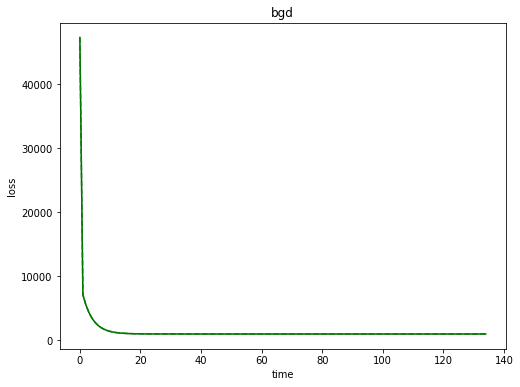

array([[-0.50331285, -0.52262577],
       [-0.41377247,  0.59389292],
       [-0.62288038, -0.52262577],
       [-0.78410717, -0.52262577],
       [-0.16489889,  0.59389292],
       [-0.68185259, -0.52262577],
       [ 0.25926825,  0.59389292],
       [ 0.88199323,  0.59389292],
       [ 0.45566197, -0.52262577],
       [-0.93992367, -0.52262577]])

In [50]:
import numpy as np

class linear:

    def __init__(self,srcX,srcY
                 ,alpha=1
                 ,maxloop=5000
                 ,epsilon = 0
                 ,data=None):
        self.srcX = srcX
        self.srcY = srcY
        self.alpha = alpha
        self.maxloop = maxloop
        self.epsilon = epsilon
        self.data = data

    def standarize(self,X):
        m, n = X.shape
        values = {}
        for j in range(n):
            features = X[:,j]
            meanVal = features.mean(axis=0)
            stdVal = features.std(axis=0)
            values[j] = [meanVal, stdVal]
            if stdVal != 0:
                X[:,j] = (features - meanVal) / stdVal
            else:
                X[:,j] = 0
        return X, values

    def data_processing(self):
        normalizedX ,normalizedValue = self.standarize(self.srcX)
        x = np.c_[np.ones(self.srcX.shape[0]),normalizedX]
        return x,normalizedValue,self.alpha,self.epsilon,self.maxloop

    def h(self,x,w):
        return np.dot(x,w)

    def loss(self,x,y,w):
        m = x.shape[0]
        return ((self.h(x,w)-y)**2).sum()/(2*m)

    def bgd_fit(self):
        y = self.srcY
        x,Value,alpha,epsilon,maxloop= self.data_processing()
        m,n =  x.shape
        theta = np.zeros((n,1))
        costs = [self.loss(x,y,theta)]
        losslog = [np.inf]
        thetas = []

        for i in range(maxloop):
            theta = theta - alpha * 1.0 / m * np.dot(x.T,(self.h(x,theta)-y))
            cost = self.loss(x,y,theta)
            costs.append(cost)
            lossvar = abs(costs[-2]-costs[-1])
            losslog.append(lossvar)
            thetas.append(theta)

            if lossvar <= epsilon or np.isinf(lossvar) or np.isnan(lossvar):
                reduction_standardization = np.array([Value[i] for i in Value])
                prediction=np.dot(np.r_[np.ones(1),(np.array([i for i in self.data])-reduction_standardization[:,0])/reduction_standardization[:,-1]],theta)
                return prediction,theta,reduction_standardization,costs,thetas,Value,losslog,i

    def __del__(self):
        print('Linear regression is complete.')

if __name__ == '__main__':
    import matplotlib.pyplot as plt
    X = np.array([[62.47, 2.0], [65.78, 3.0], [58.05, 2.0], [52.09, 2.0], [74.98, 3.0], [55.87, 2.0], [90.66, 3.0], [113.68, 3.0], [97.92, 2.0], [46.33, 2.0], [134.55, 3.0], [151.15, 3.0], [63.01, 2.0], [65.66, 2.0], [108.81, 3.0], [66.19, 3.0], [54.1, 2.0], [73.44, 2.0], [51.78, 2.0], [92.42, 3.0], [59.13, 2.0], [49.49, 1.0], [51.68, 2.0], [52.87, 2.0], [69.46, 2.0], [76.41, 2.0], [63.1, 2.0], [197.37, 5.0], [93.53, 3.0], [91.35, 3.0], [103.49, 3.0], [45.12, 2.0], [59.59, 2.0], [174.66, 4.0], [35.8, 1.0], [91.35, 3.0], [55.07, 2.0], [119.44, 3.0], [65.85, 2.0], [72.05, 3.0], [85.98, 3.0], [103.29, 4.0], [184.05, 5.0], [90.87, 3.0], [38.83, 1.0], [51.65, 1.0], [50.14, 1.0]])
    Y = np.array([[213.0], [226.0], [179.0], [188.0], [215.0], [152.0], [290.0], [375.0], [305.0], [166.0], [385.0], [500.0], [195.0], [200.0], [310.0], [205.0], [158.0], [270.0], [150.0], [310.0], [180.0], [200.0], [155.0], [178.0], [303.0], [250.0], [218.0], [630.0], [326.0], [310.0], [530.0], [138.0], [230.0], [560.0], [115.0], [400.0], [140.0], [547.0], [240.0], [250.0], [315.0], [330.0], [680.0], [302.0], [130.0], [162.0], [140.0]])
    linearmodule = linear(srcX=X,srcY=Y,alpha=1,maxloop=5000,epsilon = 0,data=[70,2])
    prediction,theta,reduction_standardization,costs,thetas,Value,losslog,time = linearmodule.bgd_fit()
    print(prediction,time)
    plt.figure(figsize=(8,6))
    plt.plot(costs,c='darkgreen')
    plt.title('bgd')
    plt.xlabel('time')  
    plt.ylabel('loss')
    plt.plot(costs,'g--')
    plt.show()
    plt.close()

X[0:10]

In [51]:
Xo = (np.random.randn(100,10)*1000).astype(int)
Yo = (np.random.randn(100)*1000)[:,None]
Xo[0:10],Yo[0:10]

(array([[  916,   461,   -89,   894,  1081,   102,  1395,  -172,  -448,
          1342],
        [ -353,  2006,  -899,  -982,   679,   155,   805, -1237,  -565,
           616],
        [  175,   979,  -846,  -283,  1177,    64, -1213, -1030,   149,
           664],
        [  237,  1417,   336, -1090, -1672, -1352,   637,  2580,   586,
           980],
        [  -80, -1093,  -140,   502,   -56,   306, -1395,   833,   476,
          1373],
        [  467,  1463,    98,  -626,   157,  1380,    12,  2010,  -960,
           704],
        [  223,  1327,    91,   156,  1543,  -587,   -81,   268, -1074,
          -198],
        [ -814,  -641,  -214,  -194,   705,  1020,   191,  1362,  -513,
           994],
        [ -527,  3476, -1017,   349, -1027,   512,   334,  1942,  -915,
           284],
        [  786,  1465, -1448,   543,    15,  1867, -1210,   -36,  -337,
           422]]),
 array([[-5.69655176e+02],
        [ 2.43198259e+03],
        [ 7.22134605e-01],
        [-9.92819953e+02],


# bgd版

In [52]:
def h(x,w):
    return np.dot(x,w)

def sigmoid(z):
    return 1/(1+np.exp(-z))

def loss(x,y,w,b=0):
    m,n = x.shape
    yhat = sigmoid(h(x,w))
    J = np.dot(np.log(1-yhat).T,-y)-np.dot(np.log(1-yhat).T,1-y)/m+(b/(2*m))*np.sum(np.square(w[1:]))
    return np.isnan(J[0]) == True and np.inf or J[0]

def bgd(x,y,alpha = 0.05,epsilon = 0.00000001,maxloop=100000,b=0):

    m,n =  x.shape
    w = np.zeros((n,1))
    cost = loss(x,y,w,b)
    costs = [cost]
    ws = [w]
    
    for time in range(maxloop):
    
        yhat = sigmoid(np.dot(x,w))
        w = w-alpha*((1/m)*np.dot(x.T,yhat-y))+(b/m)*np.r_[[0], np.squeeze(w[1:])][:,None]
        ws.append(w)
        cost = loss(x,y,w,b)
        costs.append(cost)
        
        lossvar = abs(costs[-1]-costs[-2])
        if lossvar < epsilon:
            return time, costs,ws
        elif np.isinf(lossvar) or np.isnan(lossvar):
            return lossvar
        else:
            continue

## 数据
Xlo = np.linspace(-10,10,10000)[:,None]
Ylo = (np.random.randn(10000)*10)[:,None]
m,n = Xlo.shape
b = 0
x = np.c_[np.ones((m,1)), Xlo]
y = (np.abs(Ylo/10)>1).astype(int)
##调用批量梯度下降
results1 = bgd(x,y)
time, costs,thetas = results1

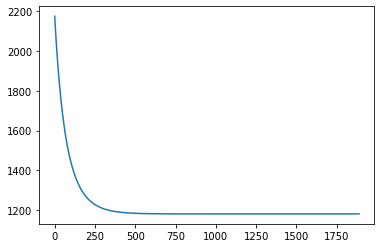

In [53]:
plt.plot(costs)